# Introduction to Data Science - Homework 6
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 22 2019, 11:59pm.

In Part 1 of this homework you will scrape github repositories and organize the information in a Pandas dataframe. In Part 2, you will use linear regression to gain meaningful insights. 

## Your Data
First Name: Jacob
<br>
Last Name: Cooper
<br>
E-mail: jacob.cooper@utah.edu
<br>
UID: u0885126
<br>

In [1]:
# imports and setup 
from bs4 import BeautifulSoup
# you can use either of these libraries to get html from a website
import time
import os

import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

# where the data is stored
DATA_PATH = "data"

### 1. Scrape Github Repository List using BeautifulSoup
In this part you will explore Github repositories, specifically the 100 most-starred repositories. You are going to scrape data from [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before you start to scrape any website you should go through the terms and services or similar pages of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/) to see whether the site permits you to scrape their data or not. Are you sure you are allowed to scrape?

**Your solution:** Yes, but with caveats. Researchers are allowed to scrape data, but only if the resulting research is open access. Archivists are allowed to scrape for archival purposes. They also have a privacy statement that you have to comply with. The github.com/robots.txt file says that you should contact github support before scrapping. In general, scrapping most things is not allowed - the /tree/master/ and /blob/master/ directories are the only onese that permit access.

### Task 1.2 Load the Data

To avoid any problems with GitHub blocking us from downloading the data many times, we have downloaded and saved all the html files in the [data](data) folder. You will be treating the data folder as your website to be scraped. The path to data folder is stored in `DATA_PATH` variable.

In the data folder you will find first 10 pages of highly starred repositories saved as `searchPage1.html`,`searchPage2.html`,`searchPage3.html` ... `searchPage10.html`

Now read these html files in python and create a soup object. This is a two step process:
 * Read the text in the html files
 * Create the soup from the files that you've read. 
 
We recommend that you create a single soup using BeautifulSoups' [append()](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#append) function.

In [2]:
## make a list of all the files. Could have been done as part of a loop, but the list comp is a little
## verbose so make a list first
search_files = [f for f in os.listdir(DATA_PATH) if os.path.isfile(os.path.join(DATA_PATH, f))]
search_files

['searchPage1.html',
 'searchPage10.html',
 'searchPage6.html',
 'searchPage7.html',
 'searchPage4.html',
 'searchPage8.html',
 'searchPage9.html',
 'searchPage5.html',
 'searchPage2.html',
 'searchPage3.html']

In [3]:
## make a dictionary to hold all these guys
searches = {} # to told the searches
added = [] # know which one's we've added

## make the big soup from the first entry
big_soup = BeautifulSoup(open(DATA_PATH + '/' + search_files[0]), "html.parser")
added.append(search_files[0])

## then add the rest of them
for search in search_files:
    searches[search] = BeautifulSoup(open(DATA_PATH + '/' + search), "html.parser")
    if search not in added:
        big_soup.append(searches[search])

## this is now the object that has all the searches
big_soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-a3b8a10d4a9e37a78f033ef4a4f525f5.css" integrity="sha512-pWLt6abkYhNeAHaDrPVG0yXCtIGRuCkwSUqQpsyN6smAIpIt+Iuq2IZKmoH9l3Cy/9ZnjvVrFZnvFFjGiqE3EA==" media="all" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/github-63c3f4f665859aeca012706b203b8da6.css" integrity="sha512-U1e8XDEbY620EmI9el+jDSQXwj9

### 1.3. Extract Data

Extract the following data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

1. Name of the repository
+ Number of contributors 
+ Programming language used 
+ Number of stars 
+ Number of issues
+ Number of forks
+ Length of readme file.

Note that you will first have to extract links from the soup that you just scraped earlier. When you extract the link for the repository it will be a path to the stored html page for the repository. You will use this path to read the file and extract the above information.

Refer to the scraping lecture for details on how to do this. We recommend you use the web inspector to identify the relevant structures. 

Save the dataframe you created to a new file `project_info.csv` and ***include this in your submission***. You will loose points if you don't.

**Approach:** The way I went about this was by opening one of the search pages, entering inspection mode, and looking at the tags for each of the things we are interested in.

So the first one is freeCodeCamp, it has the tag class="v-align-middle"

In [4]:
## because we are trying to find out properties of things, object oriented programing can help organize this
class Repo(object):
    def __init__(self, name, link):
        self.name = name
        self.link = link
        self.soup = None
        self.contributors = None
        self.language = None
        self.stars = None
        self.issues = None
        self.forks = None
        self.readme_length = None
    
    def load_soup(self, parent_path):
        """Loads the beatiful soup object to store with the class"""
        path = parent_path + '/' + self.name
        BeautifulSoup(open(DATA_PATH + '/' + search_files[0]), "html.parser")
    
    def csv_string(self):
        """Returns a string to write to a csv"""
        ## don't forget the \n
        return str(','.join([
            str(self.name), 
            str(self.contributors),
            str(self.language),
            str(self.stars),
            str(self.issues),
            str(self.forks),
            str(self.readme_length)
                ]) + "\n")

In [5]:
# this dictionary will hold all the classes by their name
repos = {}

## intiate everything with a name and a link
for link in big_soup.find_all(class_="v-align-middle"):
    if link.get("href"):
        name = link.get("href").split('/')[1]
        link = link.get("href")
        repos[link] = Repo(name, link)

In [6]:
## load the soup object for each repo
for repo in repos:
    repos[repo].soup = BeautifulSoup(open(repos[repo].link), "html.parser")

In [7]:
## sort the languages and the stars
langs_and_stars = {}
for lang in big_soup.find_all(class_="flex-shrink-0 col-6 col-md-4 pt-2 pr-md-3 d-flex"):
    link = False
    if lang.find(class_='muted-link'):
        if lang.find(class_='muted-link').get("href"):
            link = "data" + lang.find(class_='muted-link').get("href").split("/stargazers")[0] + ".html"
            langs_and_stars[link] = {"lang" : None, "stars" : None}
        if link:
            stars = lang.find(class_='muted-link').contents[-1].strip()
            if "." in stars:
                stars = stars.replace(".", "").replace("k", "00")
            else:
                stars = stars.replace("k", "000")
            langs_and_stars[link]['stars'] = stars
    if link:
        language = lang.find(class_="text-gray flex-auto min-width-0").contents[-1].strip()
        langs_and_stars[link]['lang'] = language

In [8]:
## find the issues by link
issues = {}
for block in big_soup.find_all(class_="muted-link f6 mt-2"):
    link = False
    if block.get('href'):
        link = "data" + block.get('href').split("/issues")[0] + ".html"
    if link:
        issue = block.contents[0].split('\n')[1].strip().split(' issu')[0]
        issues[link] = issue

In [9]:
## definitions for extracting the different elements
def find_contributors(repo):
    """scrape the number of contributors from a github repo"""
    ## looks like there is an href tag, 
    # <a href="/netdata/netdata/graphs/contributors">
    #   <svg class="octicon octicon-organization" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M16 12.999c0 .439-.45 1-1 1H7.995c-.539 0-.994-.447-.995-.999H1c-.54 0-1-.561-1-1 0-2.634 3-4 3-4s.229-.409 0-1c-.841-.621-1.058-.59-1-3 .058-2.419 1.367-3 2.5-3s2.442.58 2.5 3c.058 2.41-.159 2.379-1 3-.229.59 0 1 0 1s1.549.711 2.42 2.088C9.196 9.369 10 8.999 10 8.999s.229-.409 0-1c-.841-.62-1.058-.59-1-3 .058-2.419 1.367-3 2.5-3s2.437.581 2.495 3c.059 2.41-.158 2.38-1 3-.229.59 0 1 0 1s3.005 1.366 3.005 4z"></path></svg>
    #     <span class="num text-emphasized">
    #       230
    #     </span>
    #     contributors
    # </a>
    done = False ## because some have 2 that fit this criteria
    
    ## had to work around "netdata" so couldn't split on "data"
    cont_string = repo.link.split('/')
    cont_string = "/" + "/".join(cont_string[1:]).split('.html')[0] + '/graphs/contributors'
    
    for ele in repo.soup.find_all("a"):
        if ele.get("href"):
            if (ele.get("href")  == cont_string) and (not done):
                ## ugly but works. .contents turns the thing between the tags into a string. 
                contribs = ele.find(class_='num text-emphasized')
                contribs = contribs.contents[0].strip().replace(',','')
                done = True
    repo.contributors = contribs
    return repo

def find_language_and_stars(repo, lang_and_stars):
    """Find the primary language of a repo from the lang and stars dictionary search results"""
    repo.language = lang_and_stars[repo.link]['lang']
    repo.stars = lang_and_stars[repo.link]['stars']
    return repo

def find_issues(repo, issues):
    if repo.link in issues:
        repo.issues = issues[repo.link]
    else:
        repo.issues = 0
    return repo

def find_forks(repo):
    for block in repo.soup.find_all(class_="social-count"):
        if "forked" in block.prettify():
            repo.forks = block.contents[0].strip().replace(",","")
    return repo

def find_readme_length(repo):
    if repo.soup.find(class_="markdown-body entry-content"):
        text = repo.soup.find(class_="markdown-body entry-content").find_all(text=True)
        text = "".join(text)
    elif repo.soup.find(class_="Box-body p-6"):
        text = repo.soup.find(class_="Box-body p-6").find_all(text=True)
        text = "".join(text)        
    repo.readme_length = len(text)
    return repo

In [10]:
## load all the elements
for repo in repos:
    repos[repo] = find_contributors(repos[repo]) ## contributors
    repos[repo] = find_language_and_stars(repos[repo], langs_and_stars) ## languages and stars
    repos[repo] = find_issues(repos[repo], issues) ## issues
    repos[repo] = find_forks(repos[repo]) ## forks
    repos[repo] = find_readme_length(repos[repo]) ## readme length

In [11]:
## write the csv
with open('project_info.csv', 'w') as f:
    f.write('name,contributors,language,stars,issues,forks,readme_length\n')
    for repo in repos:
        f.write(repos[repo].csv_string())

### 2. Analyzing the repository data

In this part, you will analyze the data collectd in Part 1 using regression tools. The goal is to identify properties that make a repository popular. 

First, load the `project_info.csv` file in again. **We need you to do this so that we can run your code below without having to run your scraping code, which can be slow.**

In [14]:
# Read your csv here
data = pd.read_csv("project_info.csv", sep=',')
data.head(10)

name contributors    language   stars  issues  forks  \
0     freeCodeCamp         3155  JavaScript  297000      42  20915   
1             twbs         1060  JavaScript  131000      21  64021   
2            vuejs          260  JavaScript  128000       1  18203   
3         facebook         1281  JavaScript  122000       3  22169   
4       tensorflow         1835         C++  121000       0  72013   
5  EbookFoundation         1051         NaN  117000       3  29507   
6     sindresorhus          352         NaN  102000       5  13435   
7           getify          163         NaN   96300       0  18739   
8     robbyrussell         1284       Shell   83300       0  16078   
9               d3          123  JavaScript   82400       0  20381   

   readme_length  
0           5670  
1           5451  
2           2856  
3           3286  
4           3731  
5           1743  
6          14549  
7           2643  
8           7448  
9           1506

### 2.1. Reformat the data into useful datatypes

1. Print the data types for the columns of your dataframe
+ Reformat the colums Issues, Forks, Stars, and Contributers to be integer data
+ There is one repository flagged as having infinite contributers (the Linux kernel). We'll assume that it in fact has 15000 contributors (about twice as much as the next project). 

In [23]:
## what types
data.dtypes

name             object
contributors      int64
language         object
stars             int64
issues            int64
forks             int64
readme_length     int64
dtype: object

Turns out that the Forks and Stars were already ints.

In [25]:
## make the contributors into ints
def infinity_change(x):
    try:
        return int(x)
    except:
        return 15000

data['contributors'] = data['contributors'].apply(infinity_change)
data.dtypes

name             object
contributors      int64
language         object
stars             int64
issues            int64
forks             int64
readme_length     int64
dtype: object

This is a bit ugly, but it works. And of course if there were other values in there they would all become 15000. Don't know how to identify the infinity character.

### Task 2.2 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what you see.

You can re-use code from your previous homework here.

In [27]:
# describe the data
data.describe()

contributors          stars      issues         forks  readme_length
count     92.000000      92.000000   92.000000     92.000000      92.000000
mean     803.315217   54920.652174   28.706522  12641.673913   13618.478261
std     1689.501200   34129.316257   91.210725  10884.066525   24654.586623
min        2.000000   33000.000000    0.000000    919.000000     433.000000
25%      151.250000   37100.000000    0.000000   6249.750000    2133.500000
50%      390.500000   44900.000000    0.000000   9976.000000    4095.500000
75%      830.750000   57600.000000    5.750000  15220.000000   11741.750000
max    15000.000000  297000.000000  564.000000  72013.000000  158590.000000

In [30]:
data.corr()

contributors     stars    issues     forks  readme_length
contributors       1.000000  0.197997  0.001584  0.255087      -0.072464
stars              0.197997  1.000000 -0.022075  0.508887      -0.046171
issues             0.001584 -0.022075  1.000000 -0.100405      -0.095336
forks              0.255087  0.508887 -0.100405  1.000000      -0.121443
readme_length     -0.072464 -0.046171 -0.095336 -0.121443       1.000000

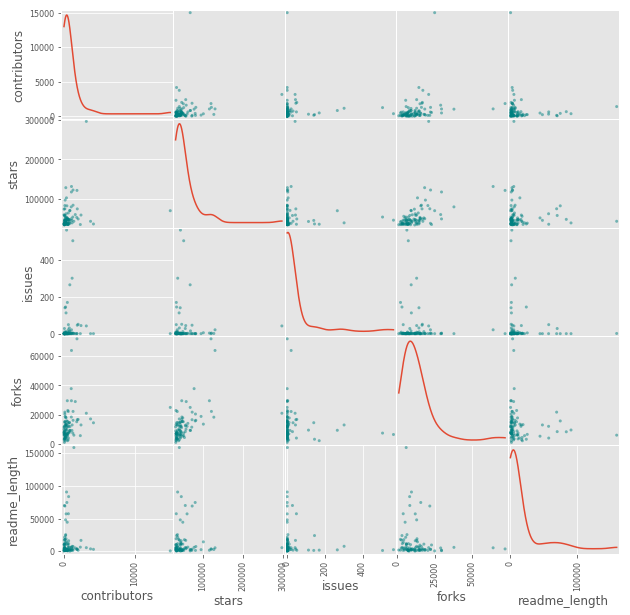

In [32]:
# trick: semi-colon prevents output
pd.plotting.scatter_matrix(data, figsize=(10, 10), diagonal='kde', color='teal');

**Your Interpretation:** The strongest correlation in the data set appears to be between Stars and Forks. This generally makes sense, the more people that have Stared the repo, the more that have Forked it to use it. There is a correlation between Forks and Contributors - this could be confounded if many people are working on the repo rather than just using it. Issues and Readme Length seem to be more or less uncoorelated with everything else. The distributions in the diagonal all seem pretty skewed, but that is probably due to the large number of contributors from the linux repo.

### 2.3. Linear regression

1. Use linear regression to try to predict the number of Stars based on Forks, Contributors, Issues, and Readme Length. Explain why this is not a very good model by discussing the R-squared , F-statistic p-value, and coefficient  p-values. 
+ Develop another model which is better. Explain why it is better and interpret your results. 

In [33]:
star_reg = sm.ols(formula="stars ~ forks + contributors + issues + readme_length", data=data).fit()
print(star_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     7.848
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.89e-05
Time:                        11:44:47   Log-Likelihood:                -1076.2
No. Observations:                  92   AIC:                             2162.
Df Residuals:                      87   BIC:                             2175.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.334e+04   5549.719      6.007

**Your interpretation:** According to the R-statistic, this model seems to correlate pretty poorly with the actual data. Most of the signal is driven by the Forks, as the other factors have p-values that would indicate they do not significantly correlate with the value we are attempting to model. The F-statistic p-value indicates that the model has coeffcients that signficicantly deviate from 0. The coefficents themselves don't provide much information, other than that an increase of about 1.5 forks correlates to an increase of 1 star. To improve the model, it might be good to look at the interaction of forks and contributors, and also by taking the programing language into account.

In [35]:
star_reg = sm.ols(formula="stars ~ forks*contributors", data=data).fit()
print(star_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     10.88
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           3.80e-06
Time:                        11:51:14   Log-Likelihood:                -1075.8
No. Observations:                  92   AIC:                             2160.
Df Residuals:                      88   BIC:                             2170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.991e+04   6879

This model does a bit better, but has two un-used terms.

In [36]:
star_reg = sm.ols(formula="stars ~ forks", data=data).fit()
print(star_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     31.45
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.22e-07
Time:                        11:51:51   Log-Likelihood:                -1076.5
No. Observations:                  92   AIC:                             2157.
Df Residuals:                      90   BIC:                             2162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.475e+04   4735.480      7.338      0.0

This one is a bit worse.

In [41]:
star_reg = sm.ols(formula="stars ~ forks + language + contributors", data=data).fit()
print(star_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1.724
Date:                Fri, 22 Feb 2019   Prob (F-statistic):             0.0624
Time:                        11:54:19   Log-Likelihood:                -922.45
No. Observations:                  79   AIC:                             1881.
Df Residuals:                      61   BIC:                             1924.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9215

This model was the best one that I found. Even though most factors don't significantly contribute to the model, adding in all the languages does help to better predict the number of stars. Still not very good though.